# Intro to AI (CS331): Project 3
#### Name:
#### Roll Number:


Feel free to import any other libraries that you might need in the cell below

In [116]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import cv2
import sklearn
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import random

# PART 1 [Decision Trees]
### [35 marks]
In this part, you have to implement the ID3 algorithm that you studied in class on a simple dataset.
## Dataset
You are provided with `car.txt`. It is a simple text file where each line represents a row of data. The details of what each feature represents is provided in the manual. Using this dataset, perform the following actions:
1. The dataset has 4 class values: 
- unacc
- acc
- good
- very good

For simplifying the implementation of ID3 algorithm, we are going to change this to make only two classes: unacc and good. 
All the instances where class is unacc will remain unacc, but all the instances where the class is anything other than unacc (acc, good, or vey good), all of these would be changed to "good" and come under the same class.

2. The dataset at the moment is quite large with more than 1700 rows and has a class imbalance as well. Reduce this to get a training dataset of 500 instances and a test dataset of 100 instances, both with roughly equal instances of both class values. 
3. Lastly, we will change the categorical variables to numbers to make it easier to work with. The conversion is given in the manual. However, do store the conversion somehwere as you are going to need to convert it back at the end to show the descision tree.
4. As for how to show the decision tree, that is upto your descretion. The simplest way would be to represent it as dictionary of dictionaries, similar to the example given in the manual.
5. Finally, evaluate your decision tree accuracy by running it for the test dataset and reporting the accuracy.

In [117]:
# code here

# PART 2 [Classification using DNN libraries]
### [15 marks]

In this task you will be working with image data to type of image using sklearns MLP classifier.

### Task 1: Make the data set

#### The images are present in a directory with the following structure: 

```
Dataset
│    
└───train_data
│   │...
│   └───subfolders
│       │   image1.jpg
│       │   image2.jpg
│       │   ...
│   
└───test_data
    │...
    └───subfolders
        │   image1.jpg
        │   image2.jpg
        │   ...

```
Your task is to read the images from path, and store them in a numpy array to make your train and test set. A skeleton code has been provided to resize and read image from path. Sample pre-processing steps have been provided, feel free to play with it, remove or alter it as you see fit.


Code provided is for notebook being run in windows environement, make necessary changes in path for colab, linux and macos


In [118]:
images_train = []
labels_train =[]
folder_path = 'Dataset/train_data'
for  img in glob(folder_path+"/**/*.jpg"):
    name = img.split('/')
    img_data = cv2.imread(img)
    img_data = cv2.cvtColor(img_data, cv2.COLOR_BGR2GRAY)
    img_data = cv2.resize(img_data, (20,20), interpolation= cv2.INTER_LINEAR)
    images_train.append(img_data)  #this'll correspond to labels list
    labels_train.append(name[2]) #for e.g [forest,forest,building,mountain,mountain] etc.
    
folder_path = 'Dataset/test_data'
images_test = []
labels_test =[]
for  img in glob(folder_path+"/**/*.jpg"):
    name = img.split('/')
    img_data = cv2.imread(img)
    img_data = cv2.cvtColor(img_data, cv2.COLOR_BGR2GRAY)
    img_data = cv2.resize(img_data, (20,20), interpolation= cv2.INTER_LINEAR)
    images_test.append(img_data)
    labels_test.append(name[2]) 

# print(len(images_test))
# print(len(labels_test))


In [119]:

# print(labels_train[3])
# print(len(labels_test))
print(labels_train)

['forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest',

### Preprocess the labels to integer encoding. Sklearns label encoder might help you with this. But you may use any other technique including one hot vectors if you wish

Hint: Making a pandas dataframe out of the labels might be helpful

In [120]:

le = LabelEncoder()
labels_train = le.fit_transform(labels_train) #fitting label encoder and returning encoded labels for e,g [1 1 1 ... 4 4 4].
labels_test = le.transform(labels_test) #just transform only. already fitted on train data

#converting to pandas dataframe
labels_train_df = pd.DataFrame({'label': labels_train})
labels_test_df = pd.DataFrame({'label': labels_test})

# print(labels_test_df)

#transforming back to original encoding
labels_train_df['label'] = le.inverse_transform(labels_train_df['label']) 
labels_test_df['label'] = le.inverse_transform(labels_test_df['label'])

# print(labels_test_df)

In [121]:
#make a neural network using Sklearn's MLP classifier.


### Making the Neural Network

You will be using Sklearns MLPClassifier for this task. Please dont use Tensorflow, pytorch or any other liabrary or a CNN based model etc. 

In [122]:
# hyper parameters initialization

max_iteration = 1000
learning_rate = 0.001
hidden_layers = (100,50,) # tuple in the form (n-t,...,n-2,n-1,n,)  dont forget the last ','


### Train the classifier and make sure to use 20% data as validation set

In [123]:
#initialize model
#y is target or validation set
X_train, X_val, y_train, y_val = train_test_split(images_train, labels_train, test_size=0.2, random_state=1)
clf = MLPClassifier(hidden_layer_sizes=hidden_layers, max_iter=max_iteration, learning_rate_init=learning_rate,activation='logistic',learning_rate='adaptive')

#3d array to 2darray. each row represent single image and column represent pixel val
X_train = np.array(images_train).reshape(len(images_train), -1) 
X_test = np.array(images_test).reshape(len(images_test), -1)
# print(X_train)

#equalizing the size of training and validation sets
num_samples = len(y_train)
X_train_reduced = random.sample(X_train.tolist(), num_samples)
X_train = np.array(X_train_reduced)

# print(len(X_train))
# print(len(y_train))

In [124]:
# Train model

# Code here

clf.fit(X_train, y_train) #fiiting model to data matrix X_train and target(s) y_train.

MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 50),
              learning_rate='adaptive', max_iter=1000)

### Display the accuracy and the f1 score on the test data set

You may use Sklearns built in functions

In [125]:

#code here

#evaluating on test data set
images_test = np.array(images_test).reshape(len(images_test), -1)
test_preds = clf.predict(images_test)
test_acc_score = accuracy_score(labels_test, test_preds)
test_f1_score = f1_score(labels_test, test_preds, average='weighted')

#scores
print("Test data set accuracy:", test_acc_score)
print("Test data set f1 score:", test_f1_score)


Test data set accuracy: 0.175
Test data set f1 score: 0.052803875784725104


### Display the confusion matrix 

Use sklearns built in function and seaborn for visualization, make sure to annonate the classes

<AxesSubplot: >

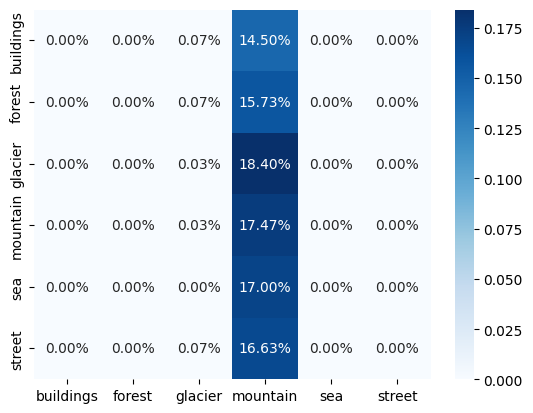

In [126]:

#code here
# display confusion matrix
cf_matrix = confusion_matrix(labels_test, test_preds)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)

## Bonus Part
### [10 marks]

### Maximize the accuracy to network parameter ratio and display it. This will be marked relatively

you may use get_params() or dirrectly use your hidden layer tuple to calculate parameters

To achieve marks your accuracy needs to be atleast 55%

# PART 3 [Neural Network from scratch]
### [50 marks]
Please go through the manual for details on this part. You are to use the `part3.csv` to train a model which you are going to make WITHOUT USING LIBRARIES. As you will see, since the data is completely seperable, your model should be able to get 100% accuracy, or something very close to it.

In [180]:
# Read the file here into your preferred data structure.
df = pd.read_csv('part3.csv')

X = df[['x','y']].to_numpy()
label = df['label'].to_numpy()

# print(X[0])
# print(label[0])
# print(len(X))  # => 1181


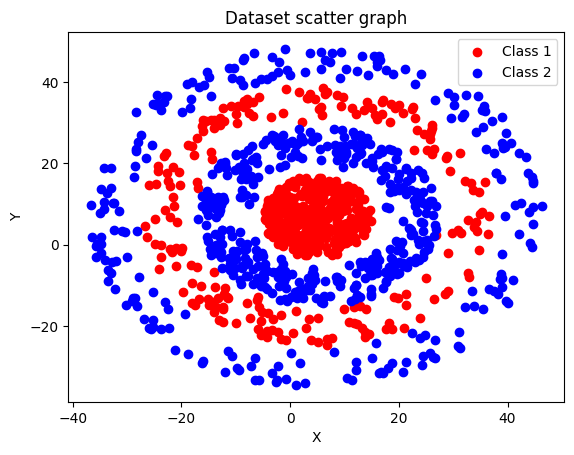

In [181]:
df = pd.read_csv('part3.csv')

X = df[['x','y']].to_numpy()
label = df['label'].to_numpy()
'''
Visualise the dataset using a SINGLE scatter plot.
Make sure to include:
1. Different coloured points for each class
2. A legend
3. x and y labels
4. PLot title
'''
# print(X_df[label_df == 1], Y_df[label_df == 1])
# code here
plt.scatter(X[:,0][label == 1], X[:, 1][label == 1], color='red', label='Class 1') #xy point with label==1 plotted as class 1 of red color points
plt.scatter(X[:,0][label == 2], X[:, 1][label == 2], color='blue', label='Class 2')#xy point with label==2 plotted as class 2 of blue color points

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dataset scatter graph')
plt.legend()
plt.show()

In [167]:
# GETTING THE TEST AND TRAIN DATASETS [you are allowed to use a library for this]

X_train,X_test,y_train,y_test = train_test_split(X,label,test_size=0.25)

In [161]:
#necessary functions for the neural network

def sigmoid(z):
    ans = 1/(1+np.exp(-z))
    return ans

def derv_sigmoid(z):
    ans = sigmoid(z)*(1-sigmoid(z))
    return ans

def forward_prop(X):
    global w1,w2,z2,z3,a2,a3
    z2 = np.dot(w1.T, X.T)
    a2 = sigmoid(z2) 
    z3 = np.dot(w2.T, a2)
    a3 = sigmoid(z3)
    return a3

#binary cross entropy loss. using this bcz its best suited for binary classification problems
def bce_loss(predicted_labels,actual_labels):
    n = actual_labels.shape[0]
    log_probabilities = np.multiply(np.log(predicted_labels), actual_labels) + np.multiply((1 - actual_labels), np.log(1 - predicted_labels))
    loss = - np.sum(log_probabilities) / n
    return loss

def backward_prop(X,actual_labels):
    global z2,z3,dw1,dw2,a2,w2
    predicted = forward_prop(X)
    m = X.shape[0]
    delta3 = predicted - actual_labels
    dz3 = np.multiply(delta3, derv_sigmoid(z3))
    dw2 = (1/m)*np.sum(np.multiply(a2, dz3), axis=1).reshape(w2.shape)
    
    delta2 = delta3*w2*derv_sigmoid(z2)
    dw1 = (1/m)*np.dot(X.T, delta2.T)

def update(learning_rate):
    global w1,w2,dw1,dw2
    w1 = w1 - learning_rate*dw1
    w2 = w2 - learning_rate*dw2

def train(X,actual_labels,iterations,learning_rate):
    for i in range(iterations):
        predicted_labels = forward_prop(X)
        loss = bce_loss(predicted_labels, actual_labels)
        backward_prop(X,actual_labels)
        update(learning_rate)

def predict(X):
    y_hat = forward_prop(X)
    y_hat = [1 if i[0] >= 0.5 else 0 for i in y_hat.T] #0.5 or 1.5??
    return np.array(y_hat)

def score(predicted, y):
    count = np.sum(predicted==y)
    return (count/len(y))*100


In [163]:
# NEURAL NETWORK FROM SCRATCH AND TRAINING 
iterations = 33
learning_rate = 1.2
num_input_units = 2
num_output_units = 1
num_hidden_units = 6 #this is a single layer #i can change num_hidden_units for tuning accuracy

#initializing weight matrices for 2 layers
np.random.seed(1)
w1 = np.random.randn(num_input_units,num_hidden_units) #w1: input->hidden layer . num_input_units*num_hidden_units matrix 2*6
w2 = np.random.randn(num_hidden_units,num_output_units) #w2: hidden layer->output layer . num_hidden_units*num_output_units matrix 6*1
print(w2)

train(X_train,y_train,iterations,learning_rate)
predicted_y = predict(X_test)
score = score(predicted_y,y_test)

print(score)


[[-0.3224172 ]
 [-0.38405435]
 [ 1.13376944]
 [-1.09989127]
 [-0.17242821]
 [-0.87785842]]


UnboundLocalError: local variable 'loss' referenced before assignment

In [189]:
labels = np.where(label == 1, 0, 1)
X_train,X_test,y_train,y_test = train_test_split(X,labels,test_size=0.25)
def sigmoid(z):
    ans = 1/(1+np.exp(-z))
    return ans

def derv_sigmoid(z):
    ans = sigmoid(z)*(1-sigmoid(z))
    return ans

def forward_prop(X):
    global w1,w2,z2,z3,a2,a3
    z2 = np.dot(w1.T, X.T)
    a2 = sigmoid(z2) 
    z3 = np.dot(w2.T, a2)
    a3 = sigmoid(z3)
    return a3

#binary cross entropy loss. using this bcz its best suited for binary classification problems
def bce_loss(predicted_labels,actual_labels):
    n = actual_labels.shape[0]
    log_probabilities = np.multiply(np.log(predicted_labels), actual_labels) + np.multiply((1 - actual_labels), np.log(1 - predicted_labels))
    loss = - np.sum(log_probabilities) / n
    return loss

def backward_prop(X,actual_labels):
    global z2,z3,dw1,dw2,a2,w2
    predicted = forward_prop(X)
    m = X.shape[0]
    delta3 = predicted - actual_labels
    dz3 = np.multiply(delta3, derv_sigmoid(z3))
    dw2 = (1/m)*np.sum(np.multiply(a2, dz3), axis=1).reshape(w2.shape)
    
    delta2 = delta3*w2*derv_sigmoid(z2)
    dw1 = (1/m)*np.dot(X.T, delta2.T)

def update(learning_rate):
    global w1,w2,dw1,dw2
    w1 = w1 - learning_rate*dw1
    w2 = w2 - learning_rate*dw2

def train(X,actual_labels,iterations,learning_rate):
    for i in range(iterations):
        predicted_labels = forward_prop(X)
        loss = bce_loss(predicted_labels, actual_labels)
        backward_prop(X,actual_labels)
        update(learning_rate)

def predict(X):
    y_hat = forward_prop(X)
    y_hat = [1 if i[0] >= 0.5 else 0 for i in y_hat.T]
    return np.array(y_hat)

def score(predicted, y):
    count = np.sum(predicted==y)
    return (count/len(y))*100

iterations = 1000
learning_rate = 0.01
num_input_units = 2
num_output_units = 1
num_hidden_units = 1000 #this is a single layer #i can change num_hidden_units for tuning accuracy

#initializing weight matrices for 2 layers
np.random.seed(1)
w1 = np.random.randn(num_input_units,num_hidden_units) #w1: input->hidden layer . num_input_units*num_hidden_units matrix 2*6
w2 = np.random.randn(num_hidden_units,num_output_units) #w2: hidden layer->output layer . num_hidden_units*num_output_units matrix 6*1
# print(w2)

train(X_train,y_train,iterations,learning_rate)
predicted_y = predict(X_test)
score = score(predicted_y,y_test)

print(score)

/tmp/ipykernel_5828/749818724.py:22: RuntimeWarning: divide by zero encountered in log
  log_probabilities = np.multiply(np.log(predicted_labels), actual_labels) + np.multiply((1 - actual_labels), np.log(1 - predicted_labels))
/tmp/ipykernel_5828/749818724.py:22: RuntimeWarning: invalid value encountered in multiply
  log_probabilities = np.multiply(np.log(predicted_labels), actual_labels) + np.multiply((1 - actual_labels), np.log(1 - predicted_labels))


71.28378378378379


In [131]:
# TESTING AND ACCURACY

# And that's it! You're done with the programming part of this course :D